In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE



In [2]:

haberman = pd.read_csv('haberman.csv')
haberman.columns = ['Age','Year','Node','Survival']

haberman.head()

,Age,Year,Node,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Node      305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
haberman.isnull().sum()

Age         0
Year        0
Node        0
Survival    0
dtype: int64

In [5]:
haberman.corr()

,Age,Year,Node,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Node,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


In [6]:
haberman['Survival'].value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [7]:
X = haberman.drop('Survival',axis=1)
Y = haberman['Survival']

print(f'Shape of X index 0 : {X.shape[0]}')
print(f'Shape of X index 1 : {X.shape[1]}')
print(f'Shape of Y : {Y.shape[0]}')


Shape of X index 0 : 305
Shape of X index 1 : 3
Shape of Y : 305


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(244, 3) (61, 3) (244,) (61,)


# Witout Resampling

In [ ]:
list_1 = np.logspace(-10,2,13)
print(list_1)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02]


In [40]:
train_score = []
test_score = []

for i in list_1:
    naive = GaussianNB(var_smoothing=i)

    naive.fit(X_train,Y_train)

    X_train_pred = naive.predict(X_train)
    X_test_pred = naive.predict(X_test)

    train_accuracy = accuracy_score(Y_train,X_train_pred)
    test_accuracy = accuracy_score(Y_test,X_test_pred)

    train_score.append(train_accuracy)
    test_score.append(test_accuracy)

    print(f"Var smoothing {i} --> Train : {train_accuracy}")
    print(f"Var smoothing {i} --> Test : {test_accuracy}")
    print("-" * 20)
 

Var smoothing 1e-10 --> Train : 0.7540983606557377
Var smoothing 1e-10 --> Test : 0.7377049180327869
--------------------
Var smoothing 1e-09 --> Train : 0.7540983606557377
Var smoothing 1e-09 --> Test : 0.7377049180327869
--------------------
Var smoothing 1e-08 --> Train : 0.7540983606557377
Var smoothing 1e-08 --> Test : 0.7377049180327869
--------------------
Var smoothing 1e-07 --> Train : 0.7540983606557377
Var smoothing 1e-07 --> Test : 0.7377049180327869
--------------------
Var smoothing 1e-06 --> Train : 0.7540983606557377
Var smoothing 1e-06 --> Test : 0.7377049180327869
--------------------
Var smoothing 1e-05 --> Train : 0.7540983606557377
Var smoothing 1e-05 --> Test : 0.7377049180327869
--------------------
Var smoothing 0.0001 --> Train : 0.7540983606557377
Var smoothing 0.0001 --> Test : 0.7377049180327869
--------------------
Var smoothing 0.001 --> Train : 0.7540983606557377
Var smoothing 0.001 --> Test : 0.7377049180327869
--------------------
Var smoothing 0.01 -->

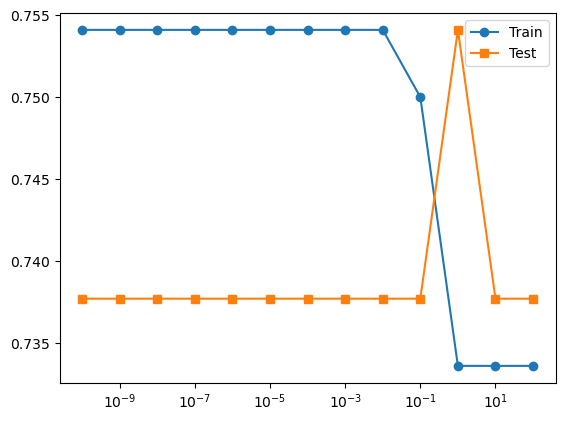

In [41]:
plt.xscale('log')
plt.plot(list_1,train_score,label ='Train',marker = 'o')
plt.plot(list_1,test_score,label = 'Test',marker = 's')
plt.legend()
plt.show()

In [42]:

naive = GaussianNB(var_smoothing=0.1)
naive.fit(X_train,Y_train)
X_train_pred = naive.predict(X_train)
X_test_pred = naive.predict(X_test)
train_accuracy = accuracy_score(Y_train,X_train_pred)
test_accuracy = accuracy_score(Y_test,X_test_pred)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
print(f"Var smoothing {i} --> Train : {train_accuracy}")
print(f"Var smoothing {i} --> Test : {test_accuracy}")
print("-" * 20)
 

Var smoothing 100.0 --> Train : 0.75
Var smoothing 100.0 --> Test : 0.7377049180327869
--------------------


In [47]:
print("Classification report - Training Set")
print(f"{classification_report(Y_train,X_train_pred,target_names=['Alive','Dead'])}")
print("Classification report - Testing Set")
print(f"{classification_report(Y_test,X_test_pred,target_names=['Alive','Dead'])}")

Classification report - Training Set
              precision    recall  f1-score   support

       Alive       0.76      0.96      0.85       179
        Dead       0.61      0.17      0.27        65

    accuracy                           0.75       244
   macro avg       0.69      0.57      0.56       244
weighted avg       0.72      0.75      0.69       244

Classification report - Testing Set
              precision    recall  f1-score   support

       Alive       0.76      0.93      0.84        45
        Dead       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



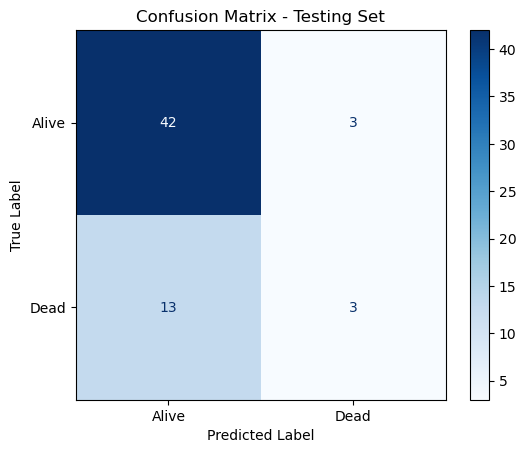

In [50]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [44]:
param = {
    'var_smoothing':np.logspace(-10,2,13)
}

In [53]:
grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='accuracy', verbose=2)

In [54]:

print(f"Best parameters for Naive Bayes : {grid_search.best_params_}")
print(f"Best cross validation accuracy : {grid_search.best_score_}")

Best parameters for Naive Bayes : {'var_smoothing': 0.1}
Best cross validation accuracy : 0.75


In [55]:
best_naive = grid_search.best_estimator_

X_train_pred_best = best_naive.predict(X_train)
X_test_pred_best = best_naive.predict(X_test)

train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")

test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Train Accuracy with Best Parameters: 0.7500
Test Accuracy with Best Parameters: 0.7377


In [57]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Alive','Dead']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Alive','Dead']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.76      0.96      0.85       179
        Dead       0.61      0.17      0.27        65

    accuracy                           0.75       244
   macro avg       0.69      0.57      0.56       244
weighted avg       0.72      0.75      0.69       244

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

       Alive       0.76      0.93      0.84        45
        Dead       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



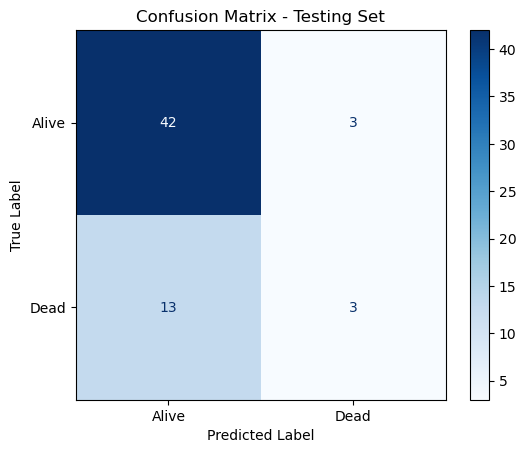

In [58]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Alive','Dead'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# With Resampling

In [ ]:

smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train_smote.value_counts())

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_smote, Y_train_smote)

X_test_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(Y_test, X_test_pred)
classification_report_result = classification_report(Y_test, X_test_pred)
confusion_matrix_result = confusion_matrix(Y_test, X_test_pred)

print("Accuracy on Test Data:", accuracy)
print("Classification Report:", classification_report_result)
print("Confusion Matrix:", confusion_matrix_result)


Class distribution after SMOTE:
Survival
1    179
2    179
Name: count, dtype: int64
Accuracy on Test Data: 0.7377049180327869
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.87      0.83        45
           2       0.50      0.38      0.43        16

    accuracy                           0.74        61
   macro avg       0.65      0.62      0.63        61
weighted avg       0.72      0.74      0.72        61

Confusion Matrix:
 [[39  6]
 [10  6]]
